In [7]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD
from keras import backend as K
import seaborn as sns
sns.set_style('white')
import os
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.python.framework import dtypes
import base64
from PIL import Image
from numpy import array
import numpy as np
import random
from matplotlib import pyplot as plt
from skimage import data
%matplotlib inline
np.random.seed(seed=17)
import csv
import pandas as pd
from scipy import ndimage, misc
from skimage import io
from sklearn import preprocessing
from sklearn.model_selection import train_test_split



Import in file paths for all the posters

In [14]:
#import in all of the movie genres and their corresponding movie ids
genre_map = pd.read_csv('/Users/aaronmyran/Dropbox/GRAD_SCHOOL/HKS/2ndyear/spring/CS109B/FinalProject/Milestone4/genre_id_mapping.csv')
genre_map =genre_map.sort('ID')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [15]:
#get a list of all of the movie poster locations on my local disk
poster_list = os.listdir("/Users/aaronmyran/Dropbox/GRAD_SCHOOL/HKS/2ndyear/spring/CS109B/FinalProject/Posters")
poster_list = poster_list[3:-1]
root_dir = "/Users/aaronmyran/Dropbox/GRAD_SCHOOL/HKS/2ndyear/spring/CS109B/FinalProject/Posters/"

In [45]:
meta_data = pd.read_csv('/Users/aaronmyran/Dropbox/GRAD_SCHOOL/HKS/2ndyear/spring/CS109B/FinalProject/Milestone4/meta_data.csv')
#remove the 
meta_data = meta_data.drop('genre', 1) #get rid of ys!

In [47]:

def convert_jpg_array(poster_name, root_dir = "/Users/aaronmyran/Dropbox/GRAD_SCHOOL/HKS/2ndyear/spring/CS109B/FinalProject/Posters/"):
    '''
    inputs: director of poster
    outputs: array of poster with shape 750,500,3
    '''
    poster_dir = root_dir + poster_name
    poster_id =  poster_name.split("-")[0]
    img = Image.open(poster_dir)
    img = misc.imresize(img, (150, 100))
    arr = array(img)
    #arr = arr.reshape(1,150,100,3)
    return poster_id,arr 

def map_id_genre(genre_id,genre_map = genre_map):
    '''
    inputs: list of all the movies and their genres
    returns: the genre of the movie
    '''
    try:
        index = genre_map.loc[genre_map['ID']==genre_id].index.values[0]
    except IndexError:
        return 'Error' #errors will be skipped
    return genre_map.iloc[index,1]

def convert_jpg_array_grey(poster_name, root_dir = "/Users/aaronmyran/Dropbox/GRAD_SCHOOL/HKS/2ndyear/spring/CS109B/FinalProject/Posters/"):
    '''
    inputs: director of poster
    outputs: array of poster with shape 750,500,1 **Greyscale**
    '''
    poster_dir = root_dir + poster_name
    poster_id =  poster_name.split("-")[0]
    img = io.imread(poster_dir, as_grey=True)
    img = misc.imresize(img, (150, 100))
    arr = array(img)
    return poster_id,arr 


def get_meta_data(movie_id, meta_data = meta_data):
    '''
    inputs: movie id
    outputs: data frame with the movie meta data
    '''
    index = meta_data.loc[meta_data['id']==movie_id].index.values[0]
    
    output = meta_data.iloc[[index]]
    output = output.drop('id',1) #get rid of index
    return output.values



test wit small list

(150, 100, 3)

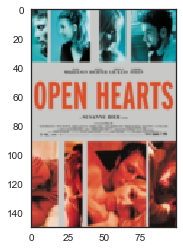

In [24]:
a = convert_jpg_array(poster_list[i])
plt.imshow(a[1])
a[1].shape


In [19]:
#CNN deets
img_rows = 150
img_cols = 100
epochs = 10
batch_size= 50
#num_classes = 12
input_shape = (3,img_rows,img_cols)


In [52]:
#small list to see if it will work in keras
train_movies, test_movies =train_test_split(poster_list[0:10000], test_size =.20 )
#train_movies = np.random.choice(poster_list, 10000, replace = False)
#test_movies = np.random.choice(poster_list, 1000, replace = False)

In [53]:

#append all the movies into 1 numpy frame for training data
train_movie_arrays = []
train_movie_id = []
train_movie_genre = []
train_meta_data = []
i = 0
for m in train_movies:
    i +=1
    if i%100==0:
        print(i)
    m_id, arr = convert_jpg_array(m)
    train_movie_id.append(int(m_id))
    movie_genre_temp = map_id_genre(int(m_id))
    if movie_genre_temp == 'Error':
        pass
    else:
        try:
            arr = arr.reshape(1,img_rows,img_cols,3)
            train_movie_arrays.append(arr)
            train_movie_genre.append(movie_genre_temp)
            train_meta_data.append(get_meta_data(int(m_id)))
        except ValueError:
            pass


#append all the movie genres into a list
train_movie_pixels = np.concatenate((train_movie_arrays), axis = 0)
train_meta_data = np.concatenate((train_meta_data), axis = 0)
x_train = train_movie_pixels
print('x_train shape:', x_train.shape)
print('meta_data shape:', train_meta_data.shape)
####***testing data too***
test_movie_arrays = []
test_movie_id = []
test_movie_genre = []
test_meta_data = []
i = 0
for m in test_movies:
    i +=1
    if i%100 == 0:
        print(i)
    m_id, arr = convert_jpg_array(m)
    movie_genre_temp = map_id_genre(int(m_id))
    if movie_genre_temp == 'Error':
        pass
    else:
        try: #exclude black and white images
            arr = arr.reshape(1,img_rows,img_cols,3)
            test_movie_arrays.append(arr)
            test_movie_genre.append(movie_genre_temp)
            test_meta_data.append(get_meta_data(int(m_id)))
        except ValueError:
            pass
#append all the movie genres into a list
test_movie_pixels = np.concatenate((test_movie_arrays), axis = 0)
x_test= test_movie_pixels
test_meta_data = np.concatenate((test_meta_data), axis = 0)

print('x_test shape:', x_test.shape)
print('meta_data shape:', test_meta_data.shape)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
x_train shape: (5958, 150, 100, 3)
meta_data shape: [[False 5000000
  "[u'Yearning for an evening without their kids, some friends plan a night out. But to do this, their husbands need to watch the kids. What can go wrong?']"
  ..., "[u'mild thematic elements and some action']" 38 'PG']
 [False 82000000
  "[u'A film about the life and career of the eccentric avant-garde comedian, Andy Kaufman.']"
  ..., "[u'language and brief sexuality/nudity']" 35 'R']
 [False 0
  '[u"The fantastical tale of a little girl who won\'t - or can\'t - follow the rules. Confounded by her clashes with the rule-obsessed world

In [93]:
num_classes = len(np.unique([test_movie_genre+train_movie_genre]))
le = preprocessing.LabelEncoder()
le.fit(np.unique([test_movie_genre+train_movie_genre]))
y_test = le.transform(test_movie_genre)
y_train = le.transform(train_movie_genre)

In [94]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [95]:
x_train = train_movie_pixels

print(len(x_train))
shape = len(x_train)/12

x0 = x_train[0:shape]
x_train = x_train[shape:]
x1 = x_train[0:shape]
x_train = x_train[shape:]
x2 = x_train[0:shape]
x_train = x_train[shape:]
x3 = x_train[0:shape]
x_train = x_train[shape:]
x4 = x_train[0:shape]
x_train = x_train[shape:]
x5 = x_train[0:shape]
x_train = x_train[shape:]
x6 = x_train[0:shape]
x_train = x_train[shape:]
x7 = x_train[0:shape]
x_train = x_train[shape:]
x8 = x_train[0:shape]
x_train = x_train[shape:]
x9 = x_train[0:shape]
x_train = x_train[shape:]
x10 = x_train[0:shape]
x_train = x_train[shape:]
x11 = x_train[0:shape]
x_train = x_train[shape:]

print(len(x_train))
x_train = train_movie_pixels


5958
6


In [96]:
###save numpy files so I don't have to run previous stuff
np.save('x_train1', x1)
np.save('x_train2', x2)
np.save('x_train3', x3)
np.save('x_train4', x4)
np.save('x_train5', x5)
np.save('x_train6', x6)
np.save('x_train7', x7)
np.save('x_train0', x0)
np.save('x_train8', x8)
np.save('x_train9', x9)
np.save('x_train10', x10)
np.save('x_train11', x11)

np.save('y_train', y_train)
np.save('x_test', x_test)
np.save('y_test', y_test)
np.save('train_meta_data', train_meta_data)
np.save('test_meta_data', test_meta_data)

In [76]:
# create an empty network model
model = Sequential()

# --- input layer ---
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=(img_rows,img_cols, 3)))
# --- max pool ---
model.add(MaxPooling2D(pool_size=(2, 2)))

# --- next layer ---
# we could double the number of filters as max pool made the 
# feature maps much smaller 
# just not doing this to improve runtime
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
# --- max pool ---
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten for fully connected classification layer
model.add(Flatten())
# note that the 10 is the number of classes we have
# the classes are mutually exclusive so softmax is a good choice
# --- fully connected layer ---
model.add(Dense(64, activation='relu'))
# --- classification ---
model.add(Dense(num_classes, activation='softmax'))

# prints out a summary of the model architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 146, 96, 16)       1216      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 73, 48, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 71, 46, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 35, 23, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 25760)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                1648704   
_________________________________________________________________
dense_10 (Dense)             (None, 11)                715       
Total para

In [ ]:
#new model trying with meta data
model = Sequential()

# --- input layer ---
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=(img_rows,img_cols, 3)))
# --- max pool ---
model.add(MaxPooling2D(pool_size=(2, 2)))

# --- next layer ---
# we could double the number of filters as max pool made the 
# feature maps much smaller 
# just not doing this to improve runtime
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
# --- max pool ---
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten for fully connected classification layer
model.add(Flatten())
# note that the 10 is the number of classes we have
# the classes are mutually exclusive so softmax is a good choice
# --- fully connected layer ---
model.add(Dense(64, activation='relu'))

# Now we create the metadata model
#meta_data_dim
metadata_processor = Sequential()
metadata_processor.add(Dense(num_classes, input_dim=metadata_dim)) ##### *** need to figure out dim***
metadata_processor.add(Activation('relu'))

merged_model = Sequential()
merged_model.add(Merge([model, metadata_processor], merge_mode='concat')  # Merge is your sensor fusion buddy
merged_model.add(Dense(this_dim, input_dim=image_plus_metadata_dim))#### *** need to figure out dim***
merged_model.add(Activation('relu'))
merged_model.add(Dense(num_classes))
merged_model.add(Activation('softmax'))

In [77]:
# this does all necessary compiling. In tensorflow this is much quicker than in theano
# the setup is our basic categorical crossentropy with stochastic gradient decent
# we also specify that we want to evaluate our model in terms of accuracy
sgd = SGD(lr=0.1, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [78]:
# this is now the actual training
# in addition to the training data we provide validation data
# this data is used to calculate the performance of the model over all the epochs
# this is useful to determine when training should stop
# in our case we just use it to monitor the evolution of the model over the training epochs
# if we use the validation data to determine when to stop the training or which model to save, we 
# should not use the test data, but a separate validation set. 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# once training is complete, let's see how well we have done
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 1739 samples, validate on 188 samples
Epoch 1/10
1739/1739 [==============================] - 112s - loss: 13.5152 - acc: 0.1535 - val_loss: 14.2319 - val_acc: 0.1170
Epoch 2/10


KeyboardInterrupt: 